# ML T-Generation Занятие 3: Линейная регрессия.
# Проблема переобучения. Кросс-валидация и регуляризация.


# Домашнее задание (6 баллов + гешефт за улучшения)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Для домашнего задания вы используете другой датасет.

In [ ]:
df = pd.read_csv('diabetes.data.csv', sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


В датасете приводится информация о пациентах и их состоянии при заболевании диабетом. Описание признаков можно прочитать [здесь](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Колонка Y - целевая переменная:

# Версия 1

In [ ]:
df1 = pd.read_csv('diabetes.data.csv', sep='\t')
reg = LinearRegression()

target = 'Y'
X1 = df1.drop([target], axis=1)
y1 = df1[target]

reg.fit(X1, y1)

print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X1.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

Сдвиг=-334.56713851878817
Коэффициент для AGE=-0.03636122422361953
Коэффициент для SEX=-22.859648090498382
Коэффициент для BMI=5.602962091923707
Коэффициент для BP=1.1168079933181883
Коэффициент для S1=-1.0899963340632173
Коэффициент для S2=0.7464504555142071
Коэффициент для S3=0.3720047150891328
Коэффициент для S4=6.533831935990336
Коэффициент для S5=68.48312496478835
Коэффициент для S6=0.280116989321499


In [ ]:
y_pred1 = reg.predict(X1)

print(f'Ошибка на обучающей выборке: {mean_squared_error(y_pred1, y1)}')

Ошибка на обучающей выборке: 2859.6963475867506


In [ ]:
from sklearn.model_selection import cross_val_score

errors = -cross_val_score(LinearRegression(), X1, y1, cv=5, scoring='neg_mean_squared_error')
print(f'Ошибка на тестовой выборке: {np.average(errors)}')

Ошибка на тестовой выборке: 2993.0813104693325


In [ ]:
def mode_Lasso(X, y, cv, array : np.ndarray):
    lambdas_lasso = array
    print("Все лямбды:")
    print(lambdas_lasso)

    lambda_errors_lasso = []

    for val in lambdas_lasso:
        reg = Lasso(alpha=val).fit(X, y)
        y_pred = reg.predict(X)
        lambda_errors_lasso.append((val, mean_squared_error(y_pred, y)))
        print(((val, mean_squared_error(y_pred, y))))
        

    min_val, min_train_error = min(lambda_errors_lasso, key=lambda x: x[1])

    best_reg = Lasso(alpha=min_val)
    cv_error = -np.average(cross_val_score(best_reg, X, y, cv=cv, scoring='neg_mean_squared_error'))

    print("\nОптимальная lambda:")
    print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

In [ ]:
mode_Lasso(X1, y1, 5, np.arange(0.1, 3.0, 0.2))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2860.290115907154)
(0.30000000000000004, 2864.3674009095084)
(0.5000000000000001, 2872.669752063161)
(0.7000000000000001, 2882.7838890350013)
(0.9000000000000001, 2893.625476198375)
(1.1000000000000003, 2909.179842675001)
(1.3000000000000003, 2925.645661489775)
(1.5000000000000004, 2944.8551712883545)
(1.7000000000000004, 2966.8064090598973)
(1.9000000000000004, 2991.4995831986803)
(2.1000000000000005, 3012.302185120677)
(2.3000000000000007, 3016.8121676601004)
(2.5000000000000004, 3021.7382690815975)
(2.7000000000000006, 3027.0777539348337)
(2.900000000000001, 3032.8279059937945)

Оптимальная lambda:
Lambda=0.10, результат=2993.80


In [ ]:
def mode_Ridge(X1, y1, cv, array : np.ndarray):
    lambdas_ridge = array
    print("Все лямбды:")
    print(lambdas_ridge)

    lambda_errors_ridge = []

    for val in lambdas_ridge:
        reg = Ridge(alpha=val).fit(X1, y1)
        y_pred1 = reg.predict(X1)
        lambda_errors_ridge.append((val, mean_squared_error(y_pred1, y1)))
        print(((val, mean_squared_error(y_pred1, y1))))
        

    min_val, min_train_error = min(lambda_errors_ridge, key=lambda x1: x1[1])

    best_reg = Ridge(alpha=min_val)
    cv_error = -np.average(cross_val_score(best_reg, X1, y1, cv=cv, scoring='neg_mean_squared_error'))

    print("\nОптимальная lambda:")
    print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

In [ ]:
mode_Ridge(X1, y1, 5, np.arange(0.1, 3.0, 0.2))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2859.7052888408193)
(0.30000000000000004, 2859.774235659144)
(0.5000000000000001, 2859.905871794043)
(0.7000000000000001, 2860.094257022983)
(0.9000000000000001, 2860.334006114158)
(1.1000000000000003, 2860.6202321466926)
(1.3000000000000003, 2860.9484962393894)
(1.5000000000000004, 2861.3147628889387)
(1.7000000000000004, 2861.7153602275894)
(1.9000000000000004, 2862.14694460314)
(2.1000000000000005, 2862.6064689634472)
(2.3000000000000007, 2863.0911545954873)
(2.5000000000000004, 2863.5984658272505)
(2.7000000000000006, 2864.126087350754)
(2.900000000000001, 2864.6719038675715)

Оптимальная lambda:
Lambda=0.10, результат=2993.07


## **Вывод**: Запустил с "коробки", с лоссом беда :(

# Версия 2

In [ ]:
df2 = pd.read_csv('diabetes.data.csv', sep='\t')
df2.head(3)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141


In [ ]:
reg = LinearRegression()

target = 'Y'
X2 = df2.drop([target, 'AGE', 'S3', 'S6'], axis=1)
y2 = df2[target]
reg.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X2.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

Сдвиг=-296.3984003441918
Коэффициент для SEX=-22.56440375948867
Коэффициент для BMI=5.702224918559901
Коэффициент для BP=1.149325682552682
Коэффициент для S1=-0.8463136292465352
Коэффициент для S2=0.5529637043798683
Коэффициент для S4=4.991419010320271
Коэффициент для S5=64.29184269402566


In [ ]:
y_pred2 = reg.predict(X2)
print(f'Ошибка на обучающей выборке после удаления колонок: {mean_squared_error(y_pred2, y2)}')

Ошибка на обучающей выборке после удаления колонок: 2868.343466201382


In [ ]:
errors = -cross_val_score(LinearRegression(), X2, y2, cv=4, scoring='neg_mean_squared_error')
print(f'Ошибка на тестовой выборке после удаления колонок и изменения cv: {np.average(errors)}')

Ошибка на тестовой выборке после удаления колонок и изменения cv: 2925.7913684126884


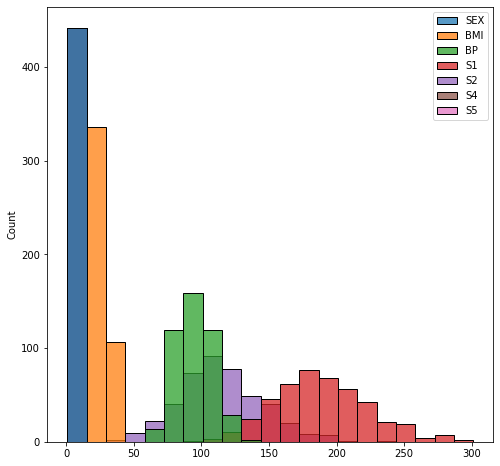

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(X2);

P.S. Длинные хвосты у S1 и S2, надо избавляться

## **Вывод**: Веса перед колонками "AGE", "S3", "S6" небольшие (выше в версии 1 вывел значения), попробовал удалить эти колонки, также изменил cv на 4, в итоге удалось улучшить MSE - было **2993.08** -> стало **2925.79** 

# Версия 3

In [ ]:
df3 = pd.read_csv('diabetes.data.csv', sep='\t')
df3 = df3.astype(float)
df3.head(3)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0


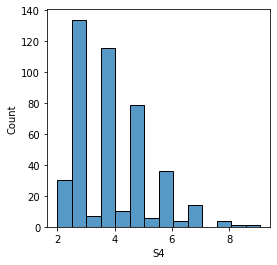

In [ ]:
plt.figure(figsize=(4,4))
sns.histplot(df3['S4']); # Удалим еще S4, так как распределение далеко от нормального

In [ ]:
df3 = df3.drop(['AGE', 'S4', 'S3', 'S6'], axis=1)

In [ ]:
target = 'Y'
X3 = df3.drop([target], axis=1)
y3 = df3[target]

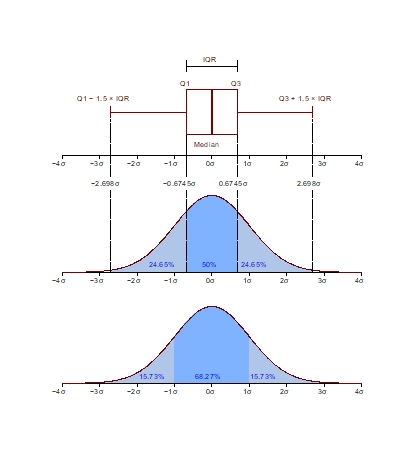

In [ ]:
Q1 = X3.quantile(0.25)
Q3 = X3.quantile(0.75)
IQR = Q3 - Q1
for column in list(X3.columns):
    for i in range(len(X3)):
        if column == 'S1' or column == 'S2':
            if ((X3[column].loc)[i] < (Q1[column] - 1.5*IQR[column])) or ((X3[column].loc)[i] > (Q3[column] + 1.5*IQR[column])):
                (X3[column].loc)[i] = 0.0
X3.head(3)

,SEX,BMI,BP,S1,S2,S5
0,2.0,32.1,101.0,157.0,93.2,4.8598
1,1.0,21.6,87.0,183.0,103.2,3.8918
2,2.0,30.5,93.0,156.0,93.6,4.6728


In [ ]:
for column in list(X3.columns):
    for i in range(len(X3)):
        if column == 'S1' or column == 'S2':
            if (X3[column].loc)[i] == 0.0:
                (X3[column].loc)[i] = np.mean(X3[column])
X3.head(3)

,SEX,BMI,BP,S1,S2,S5
0,2.0,32.1,101.0,157.0,93.2,4.8598
1,1.0,21.6,87.0,183.0,103.2,3.8918
2,2.0,30.5,93.0,156.0,93.6,4.6728


In [ ]:
reg = LinearRegression()

reg.fit(X3, y3)

print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X3.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

Сдвиг=-305.98503136505997
Коэффициент для SEX=-21.652814843156413
Коэффициент для BMI=5.805821923870852
Коэффициент для BP=1.0995745562150443
Коэффициент для S1=-1.0188612662054615
Коэффициент для S2=0.8251591534998743
Коэффициент для S5=70.99494518436275


In [ ]:
y_pred3 = reg.predict(X3)

print(f'Ошибка на обучающей выборке: {mean_squared_error(y_pred3, y3)}')

Ошибка на обучающей выборке: 2855.6213866302164


In [ ]:
from sklearn.model_selection import cross_val_score

errors = -cross_val_score(LinearRegression(), X3, y3, cv=7, scoring='neg_mean_squared_error')
print(f'Ошибка на тестовой выборке: {np.average(errors)}')

Ошибка на тестовой выборке: 2912.0839331593925


In [ ]:
mode_Ridge(X3, y3, 7, np.arange(1.0, 100.0, 10.0))

Все лямбды:
[ 1. 11. 21. 31. 41. 51. 61. 71. 81. 91.]
(1.0, 2855.8292739617978)
(11.0, 2873.9629282497567)
(21.0, 2906.5200865394036)
(31.0, 2942.8920825811974)
(41.0, 2978.8693712373883)
(51.0, 3012.815378773708)
(61.0, 3044.185615112586)
(71.0, 3072.9088718978696)
(81.0, 3099.1145663810394)
(91.0, 3123.008661603523)

Оптимальная lambda:
Lambda=1.00, результат=2911.77


In [ ]:
mode_Lasso(X3, y3, 7, np.arange(1.0, 100.0, 10.0))

Все лямбды:
[ 1. 11. 21. 31. 41. 51. 61. 71. 81. 91.]
(1.0, 2870.0706717554353)
(11.0, 3584.5512634175143)
(21.0, 3601.211999659931)
(31.0, 3628.2764754416035)
(41.0, 3665.749661365271)
(51.0, 3713.631557430932)
(61.0, 3771.9221636385864)
(71.0, 3840.621479988236)
(81.0, 3919.7295064798795)
(91.0, 4009.2462431135164)

Оптимальная lambda:
Lambda=1.00, результат=2925.40


P.S. Ridge в одну "калитку" обыграл Lasso

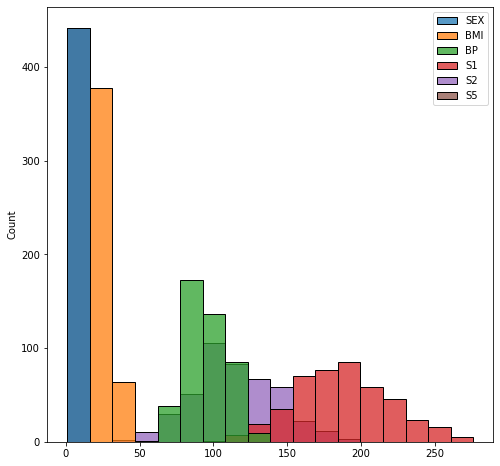

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(X3);

## **Вывод**:  теперь удалил хвосты у 'S1' и 'S2', а также удалил колонку 'S4' в виду не очень хорошего распределния, и дополнительно поигрался с cv, поставил равным 7, в итоге удалось улучшить MSE - было **2925.79** -> стало **2912.08**, а после применения Ridge стало **2911.77**

# Версия 4

In [ ]:
from sklearn import preprocessing
from itertools import combinations

In [ ]:
df4 = pd.read_csv('diabetes.data.csv', sep='\t')
df4 = df4.astype(float)
df4.head(3)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0


In [ ]:
target = 'Y'
X4 = df4.drop([target], axis=1)
y4 = df4[target]

In [ ]:
X4 = X4.drop(['SEX', 'S4'], axis=1)

In [ ]:
columns = X4.columns
d = preprocessing.scale(X4)
X4 = pd.DataFrame(d, columns=columns)
X4.head(3)

,AGE,BMI,BP,S1,S2,S3,S5,S6
0,0.800500,1.297088,0.459841,-0.929746,-0.732065,-0.912451,0.418531,-0.370989
1,-0.039567,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-1.436589,-1.938479
2,1.793307,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,0.060156,-0.545154


In [ ]:
X4['SEX'] = df4['SEX']
X4['S4'] = df4['S4']
X4.head(3)

,AGE,BMI,BP,S1,S2,S3,S5,S6,SEX,S4
0,0.800500,1.297088,0.459841,-0.929746,-0.732065,-0.912451,0.418531,-0.370989,2.0,4.0
1,-0.039567,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-1.436589,-1.938479,1.0,3.0
2,1.793307,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,0.060156,-0.545154,2.0,4.0


In [ ]:
column_list = X4.columns
interactions = list(combinations(column_list, 2))

In [ ]:
interactions[:3]

[('AGE', 'BMI'), ('AGE', 'BP'), ('AGE', 'S1')]

In [ ]:
interaction_dict = {}
for interaction in interactions:
   X_train = X4
   X_train['CATEG'] = X_train[interaction[0]] * X_train[interaction[1]]
   reg = LinearRegression()
   reg.fit(X_train, y4)
   interaction_dict[reg.score(X_train, y4)] = interaction

In [ ]:
top_5 = sorted(interaction_dict.keys(), reverse = True)[:10]
for interaction in top_5:
    print(interaction_dict[interaction])

('AGE', 'SEX')
('BMI', 'BP')
('BMI', 'S6')
('AGE', 'S5')
('AGE', 'S6')
('AGE', 'BP')
('BP', 'SEX')
('S5', 'S6')
('BMI', 'SEX')
('S6', 'S4')


In [ ]:
X_train = X4
X_train ['AGE_SEX'] = X_train['AGE'] * X_train['SEX']

In [ ]:
X_train ['BMI_BP'] = X_train['BMI'] * X_train['BP']

In [ ]:
X_train ['BMI_S6'] = X_train['BMI'] * X_train['S6']

In [ ]:
X_train ['AGE_S5'] = X_train['AGE'] * X_train['S5']

In [ ]:
X_train ['AGE_BP'] = X_train['AGE'] * X_train['BP']

In [ ]:
X_train ['BP_SEX'] = X_train['BP'] * X_train['SEX']

In [ ]:
reg = LinearRegression()

reg.fit(X_train, y4)

print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X_train.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

Сдвиг=111.95195253184906
Коэффициент для AGE=-21.990469226256813
Коэффициент для BMI=24.38702431612626
Коэффициент для BP=5.987518010061278
Коэффициент для S1=-54.62615204039564
Коэффициент для S2=38.99338250564598
Коэффициент для S3=13.386544648446591
Коэффициент для S5=41.639736230243976
Коэффициент для S6=3.2621830096861566
Коэффициент для SEX=-0.5902523753726461
Коэффициент для S4=16.389024688083055
Коэффициент для CATEG=-5.390256006201176
Коэффициент для AGE_SEX=15.765917732951243
Коэффициент для BMI_BP=5.923849417191597
Коэффициент для BMI_S6=3.6371632366820315
Коэффициент для AGE_S5=4.441719308743439
Коэффициент для AGE_BP=1.9847015906900602
Коэффициент для BP_SEX=5.950033436188844


In [ ]:
y_pred4 = reg.predict(X_train)

print(f'Ошибка на обучающей выборке: {mean_squared_error(y_pred4, y4)}')

Ошибка на обучающей выборке: 2659.183039480778


In [ ]:
from sklearn.model_selection import cross_val_score

errors = -cross_val_score(LinearRegression(), X_train, y4, cv=4, scoring='neg_mean_squared_error')
print(f'Ошибка на тестовой выборке: {np.average(errors)}')

Ошибка на тестовой выборке: 2800.254585671904


In [ ]:
mode_Ridge(X4, y4, 4, np.arange(1, 100, 10))

Все лямбды:
[ 1 11 21 31 41 51 61 71 81 91]
(1, 2661.6285214516834)
(11, 2690.5693418548)
(21, 2704.239724250425)
(31, 2714.249829360188)
(41, 2722.9341651524746)
(51, 2731.0558035407976)
(61, 2738.9482982726313)
(71, 2746.7782616176596)
(81, 2754.633673241791)
(91, 2762.5611241782644)

Оптимальная lambda:
Lambda=1.00, результат=2797.67


In [ ]:
def Ridge_modernize(X, y, cv, array : np.ndarray):
    lambdas_ridge = array

    train, test = [], []

    for val in lambdas_ridge:
        reg = Ridge(alpha=val).fit(X, y)
        y_pred = reg.predict(X)
    
        val_reg = Ridge(alpha=val)
        cv_error = -np.average(cross_val_score(val_reg, X, y, cv=cv, scoring='neg_mean_squared_error'))
        train.append(mean_squared_error(y_pred, y))
        test.append(cv_error)
    return train, test

In [ ]:
val = Ridge_modernize(X4, y4, 4, np.arange(1, 100, 10))

In [ ]:
def MSE_lambda(val):
  list_lambda = []
  for i in range(1, 100, 10):
    list_lambda.append(i)

  plt.xlabel("lambda")
  plt.ylabel("MSE")
  plt.plot(list_lambda, val[0], 'b', list_lambda, val[1], 'r');

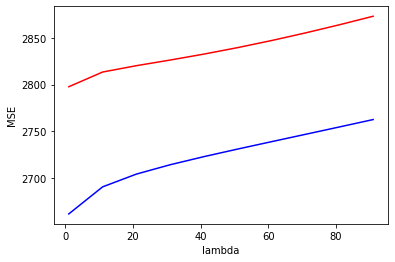

In [ ]:
MSE_lambda(val)

## **Вывод**: теперь сформировал в пары все признаки и выделил топ-10 самых сильных взаимодействия между собой, добавил некоторые эти взаимодействия в наш DataFrame, качество заметно возросло! Было **2911.77** -> Стало **2800.25**, но я на этом не остановился, применил Ridge и в итоге конечный **MSE = 2797.67**  